# The Sparks Foundation
# Task 7 : Stock Market Prediction Using Numerical Analysis and Textual Analysis

#### DATA SCIENCE AND BUSINESS ANALYTICS INTERN: RASHMI KUMARI

#### Objective:
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock price,and sentimental analysis of news headlines

Dataset

* historical stock price : https://finance.yahoo.com/
* News headlines : https://bit.ly/36fFPI6

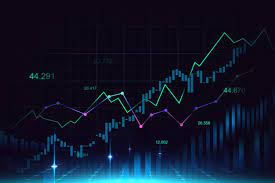

##### Step 1: Importing the required Libraries

In [1]:
#Import general libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
#Importing libraries required for TEXTUAL ANALYSIS.

from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
#Importing Libraries required for NUMERICAL ANALYSIS.

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [4]:
#Importing Libraries required for PREDICTION

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
#Download the dataset from the given links.

import pandas_datareader.data as pdr
data=pdr.DataReader('^BSESN','yahoo',start='2017-01-01', end='2022-09-13')    # ^BSESN : is the symbol in Yahoo!Finance.
                                      # ^BSESN - S&P BSE SENSEX

In [6]:
#Filter the warnings.
import warnings
warnings.filterwarnings("ignore")

In [7]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
2017-01-03,26724.400391,26488.369141,26616.919922,26643.240234,9800.0,26643.240234
2017-01-04,26723.369141,26606.060547,26677.220703,26633.130859,8100.0,26633.130859
2017-01-05,26917.210938,26738.419922,26738.419922,26878.240234,9800.0,26878.240234
2017-01-06,27009.609375,26733.330078,26929.689453,26759.230469,7800.0,26759.230469


In [8]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-07,59166.460938,58722.890625,58789.261719,59028.910156,9000.0,59028.910156
2022-09-08,59711.960938,59315.710938,59374.988281,59688.218750,12100.0,59688.218750
2022-09-09,60119.800781,59634.390625,60045.750000,59793.140625,13100.0,59793.140625
2022-09-12,60284.550781,59912.289062,59912.289062,60115.128906,14300.0,60115.128906
2022-09-13,60635.281250,60381.019531,60408.289062,60571.078125,0.0,60571.078125


In [9]:
#Converting this obtained file into CSV.
data.to_csv("Stock_price.csv")

##### Step 2: Import Datasets

In [10]:
#Importing the stock market price dataset which is in csv.
stock=pd.read_csv('Stock_price.csv')

#Importing the Indian_news_headlines dataset which is in csv.
news = pd.read_csv('india-news-headlines.csv')
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [11]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
1,2017-01-03,26724.400391,26488.369141,26616.919922,26643.240234,9800.0,26643.240234
2,2017-01-04,26723.369141,26606.060547,26677.220703,26633.130859,8100.0,26633.130859
3,2017-01-05,26917.210938,26738.419922,26738.419922,26878.240234,9800.0,26878.240234
4,2017-01-06,27009.609375,26733.330078,26929.689453,26759.230469,7800.0,26759.230469


In [12]:
stock.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
1399,2022-09-07,59166.460938,58722.890625,58789.261719,59028.910156,9000.0,59028.910156
1400,2022-09-08,59711.960938,59315.710938,59374.988281,59688.218750,12100.0,59688.218750
1401,2022-09-09,60119.800781,59634.390625,60045.750000,59793.140625,13100.0,59793.140625
1402,2022-09-12,60284.550781,59912.289062,59912.289062,60115.128906,14300.0,60115.128906
1403,2022-09-13,60635.281250,60381.019531,60408.289062,60571.078125,0.0,60571.078125


In [13]:
stock.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close
826,2020-05-19,30739.960938,30116.820312,30450.740234,30196.169922,18700.0,30196.169922
1322,2022-05-18,54786.000000,54130.890625,54554.890625,54208.531250,5800.0,54208.531250
485,2018-12-18,36375.378906,36046.519531,36226.378906,36347.078125,20793100.0,36347.078125
69,2017-04-13,29660.480469,29442.259766,29637.119141,29461.449219,10700.0,29461.449219
176,2017-09-18,32508.060547,32361.250000,32361.369141,32423.759766,9500.0,32423.759766
1251,2022-02-01,59032.199219,57737.660156,58672.859375,58862.570312,14000.0,58862.570312
345,2018-05-24,34741.460938,34367.828125,34404.140625,34663.109375,15800.0,34663.109375
1035,2021-03-17,50561.121094,49718.648438,50436.019531,49801.621094,100.0,49801.621094
742,2020-01-13,41899.628906,41720.761719,41788.210938,41859.691406,10600.0,41859.691406
962,2020-12-01,44730.789062,44118.101562,44435.828125,44655.441406,16000.0,44655.441406


In [14]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [15]:
news.tail()

,publish_date,headline_category,headline_text
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...
3650969,20220331,city.salem,Tamil Nadu sees marginal rise of Covid cases w...


In [16]:
news.sample(10)

,publish_date,headline_category,headline_text
1342845,20120405,city.mumbai,Soon; special building tag for schools; hotels
3023091,20181110,city.delhi,AAP MP files complaint against Tiwari; wants FIR
1311820,20120220,city.chandigarh,Youths do sit-ups for brawl
236929,20030818,city.lucknow,Discoms creation: A half-baked plan?
3435419,20210123,city.pune,Vax on 5 days every week at 511 centres from M...
2823968,20180128,city.noida,Property dealer robbed of wallet near railway ...
1415340,20120718,city.mangaluru,Rakshitha to roll out BSR Congress units in co...
2066003,20150207,city.nashik,Army hang gliders reach city as part of 180-km...
188126,20030225,city.kolkata,First IGNOU study centre in Howrah
2362971,20160408,city.chandigarh,Ex-cop's son named in rape; extortion case


In [17]:
print("The shape of the Stock Price Dataset is:",stock.shape)
print("The shape of the Indian_news_headlines Dataset is",news.shape)

The shape of the Stock Price Dataset is: (1404, 7)
The shape of the Indian_news_headlines Dataset is (3650970, 3)


##### Step 3: Pre-Processing of Data

######  * News_Headlines Dataset Pre-processing

In [18]:
news.shape

(3650970, 3)

In [19]:
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [20]:
#We dont need headline_category , so lets drop it.
news.drop(columns=['headline_category'],inplace=True)
news.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [21]:
#Lets rename the column names of news dataset.
news.rename(columns={'publish_date':'Date','headline_text':'News'},inplace=True)
news.head()

,Date,News
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [22]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    int64 
 1   News    object
dtypes: int64(1), object(1)
memory usage: 55.7+ MB


In [23]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1404 non-null   object 
 1   High       1404 non-null   float64
 2   Low        1404 non-null   float64
 3   Open       1404 non-null   float64
 4   Close      1404 non-null   float64
 5   Volume     1404 non-null   float64
 6   Adj Close  1404 non-null   float64
dtypes: float64(6), object(1)
memory usage: 76.9+ KB


In [24]:
#We can see the datatype of Date in News dataset is interger where as in Stock dataset it is object.
#Lets convert them to objects first and then to datetime. so that there format and nature will be same as we need to merge the
#further.

news['Date']=news['Date'].apply(str)

In [25]:
news['Date'].dtype

dtype('O')

In [26]:
stock['Date'].dtype

dtype('O')

In [27]:
#Now lets change then to datetime.
stock['Date'] = pd.to_datetime(stock['Date'])
stock

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
1,2017-01-03,26724.400391,26488.369141,26616.919922,26643.240234,9800.0,26643.240234
2,2017-01-04,26723.369141,26606.060547,26677.220703,26633.130859,8100.0,26633.130859
3,2017-01-05,26917.210938,26738.419922,26738.419922,26878.240234,9800.0,26878.240234
4,2017-01-06,27009.609375,26733.330078,26929.689453,26759.230469,7800.0,26759.230469
...,...,...,...,...,...,...,...
1399,2022-09-07,59166.460938,58722.890625,58789.261719,59028.910156,9000.0,59028.910156
1400,2022-09-08,59711.960938,59315.710938,59374.988281,59688.218750,12100.0,59688.218750
1401,2022-09-09,60119.800781,59634.390625,60045.750000,59793.140625,13100.0,59793.140625
1402,2022-09-12,60284.550781,59912.289062,59912.289062,60115.128906,14300.0,60115.128906


In [28]:
news['Date'] = pd.to_datetime(news['Date'])
news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3650965,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...


In [29]:
#Just to look whether they are able to get merged or not ,lets perform the merge.

Temp_merge=pd.merge(news,stock,how='inner',on='Date')
Temp_merge

,Date,News,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,Destress plan for the first Monday of 2017,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
1,2017-01-02,Pune: Tribunal grants Rs 28.93 lakh as damage ...,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
2,2017-01-02,Villages near Tehri Lake; Devalsari and Ranikh...,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
3,2017-01-02,Rebellion; show of unity; sting operations; Co...,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
4,2017-01-02,Haldwani surgeons find 'belan' in woman's abdomen,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
...,...,...,...,...,...,...,...,...
742922,2022-03-31,J&K sacks 2 cops; 3 other employees over terro...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719
742923,2022-03-31,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719
742924,2022-03-31,As Covid-19 cases drop to nil in southern dist...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719
742925,2022-03-31,Tamil Nadu sees marginal rise of Covid cases w...,58890.921875,58485.789062,58779.710938,58568.511719,4400.0,58568.511719


In [30]:
Temp_merge.isnull().sum()   #No null value is there.

Date         0
News         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [31]:
#This is to check whether there is any null value present in the dataset or not.
news.isnull().sum()    #This shows no null value is there in any of the column.

Date    0
News    0
dtype: int64

In [32]:
#This is to check wheather there is any duplicate value is there or not?

news.duplicated().sum()

162098

In [33]:
#This above value shows that yes there are duplicated values present in the dataset .

# for getting the non-duplicate values = total values -duplicate values

3650970-162098

3488872

In [34]:
#3626110 this must be non duplicate values.Lets obtain it by code.

news.drop_duplicates(inplace=True)

In [35]:
news.duplicated().sum()     # This 0 shows that , there is no more dupliacte values .Lets check the shape now rows must be
                            #equal to 3488872.

0

In [36]:
news.shape   #We got the correct answer.Lets move further.

(3488872, 2)

In [37]:
#For now there is no use of Category.So we need to drop the column Category,

In [38]:
#Lets Remove the special charaters from the news text by creating a function.

In [39]:
def remove_special_chars(text):
    result=" "
    
    for i in text:
        if i.isalnum()  or i==' ':   # The isalnum() method returns True if all characters in the string are alphanumeric 
                                     # (either alphabets or numbers). If not, it returns False.
            result= result+i
            # print(result)
        else:
            result=result + " "
    return result.strip()        

In [40]:
news['News'][0]    #here  ; semicolon is a special charater.

'Status quo will not be disturbed at Ayodhya; says Vajpayee'

In [41]:
remove_special_chars('Status quo will not be disturbed at Ayodhya; says Vajpayee')


'Status quo will not be disturbed at Ayodhya  says Vajpayee'

In [42]:
news['News'][2]    #here ? question mark is a special charater.

"America's unwanted heading for India?"

In [43]:
remove_special_chars("America's unwanted heading for India?")

'America s unwanted heading for India'

In [44]:
#So ensures that this function is working.

In [45]:
headlines_df=news

In [46]:
#Applying the special charater removal function of news headlines.

headlines_df['News']=headlines_df['News'].apply(remove_special_chars)

In [47]:
#So we can compare Before_removal of Special charater and after removal of special charater.

In [48]:
before=news['News'][2]
before

'America s unwanted heading for India'

In [49]:
after=headlines_df['News'][2]                 #This shows this function got applied on all the text healines.
after

'America s unwanted heading for India'

In [50]:
#Grouping all the headlines for each day.

headlines_df['News']=headlines_df.groupby(['Date']).transform(lambda x: " ".join(x))   

#This is to join all the news of same date, in just one paragraph kind of.

In [51]:
headlines_df.head(30)     #This seems like , the grouped text para , is repeating itself.
                          #Also indexing is also not correct as after 25 ,  52 appeard which is wrong.
                          

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Status quo will not be disturbed at Ayodhya s...
2,2001-01-02,Status quo will not be disturbed at Ayodhya s...
3,2001-01-02,Status quo will not be disturbed at Ayodhya s...
4,2001-01-02,Status quo will not be disturbed at Ayodhya s...
5,2001-01-02,Status quo will not be disturbed at Ayodhya s...
6,2001-01-02,Status quo will not be disturbed at Ayodhya s...
7,2001-01-02,Status quo will not be disturbed at Ayodhya s...
8,2001-01-02,Status quo will not be disturbed at Ayodhya s...
9,2001-01-02,Status quo will not be disturbed at Ayodhya s...


In [52]:
#Lets check the para first of any two index.

In [53]:
headlines_df['News'][0]

'Status quo will not be disturbed at Ayodhya  says Vajpayee Fissures in Hurriyat over Pak visit America s unwanted heading for India For bigwigs  it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers  says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters  pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM s warning India  Pak exchange lists of N plants Will Qureshi s return really help the govt PM s tacit message  Put Ram tample on hold Text of the Prime Minister s article NCW to focus on violence against women BBC s reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist Mafia calls the shots in Gandhinagar too

In [54]:
headlines_df['News'][10]

'Status quo will not be disturbed at Ayodhya  says Vajpayee Fissures in Hurriyat over Pak visit America s unwanted heading for India For bigwigs  it is destination Goa Extra buses to clear tourist traffic Dilute the power of transfers  says Riberio Focus shifts to teaching of Hindi IT will become compulsory in schools Move to stop freedom fighters  pension flayed Gilani claims he applied for passport 2 years ago Parivar dismisses PM s warning India  Pak exchange lists of N plants Will Qureshi s return really help the govt PM s tacit message  Put Ram tample on hold Text of the Prime Minister s article NCW to focus on violence against women BBC s reality TV will focus on AIIMS Jaitley firm on legal reforms Hoshangabad farmers have enough water BJP jumps into rail track conversion issue State may take AP to court over Krishna This official has sued the briber Park turns temple compound as residents watch Moves afoot to evict squatters in Urban dist Mafia calls the shots in Gandhinagar too

In [55]:
#So we can clearly observe that this is repeating the entire paragraph so we need to drop the duplicates and reset the index .

headlines_df.drop_duplicates(inplace=True)

In [56]:
headlines_df.reset_index(inplace=True,drop=True)

In [57]:
headlines_df.head()

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [58]:
headlines_df.shape    #Now we have only the unique news .and shape got reduced to 7718.

(7717, 2)

###### Understand the Polarity and Subjectivity 


* Polarity, also known as orientation is he emotion expressed in the sentence. It can be positive, neagtive or neutral.
* Subjectivity is when text is an explanatory article which must be analysed in context.

Polarity : 
It refers to the strength of an opinion. It could be positive or negative. If something has a strong positive feeling or emotion associated with it, such as admiration, trust, love; this will indeed have a certain orientation towards all other aspects of that object’s existence. The same goes for negative polarities. A good example would be the following: ‘I don’t think I’ll buy this item because my previous experience with a similar item wasn’t so good.’ That will have a negative polarity.



The strength of positive and negative polarities can vary depending on the situation, but they are still considered to be strongly positive or negative.The use of these words might indicate how much they value an object in a subjective way or not; therefore, subjectivity comes into play here as well.

-------------------------------------------------------------------------------------------------------------------------------
Subjectivity : 
It refers to the degree to which a person is personally involved in an object. What matters the most here are personal connections and individual experiences with that object, which may or may not differ from someone else’s point of view. For example: ‘I’m very happy with my new smartphone because it has the highest performance available on the market.’ Similarly to polarity, strong subjectivity may be negative or positive. The statement here is clearly subjective because the user is actually talking about his experience and how he feels about an object.



Sentiment analysis tools must be able to distinguish between both polarity and subjectivity in order to analyze users’ opinions correctly. An opinion can have a high degree of subjectivity if it’s expressed as a personal experience, whereas a low degree may indicate someone else’s viewpoint on something else. 
Sentiments can also have different levels of polarity throughout different ways of communication – e-mails, chats or other posts might be either strongly positive, negative or; in some other cases, they might have even a neutral polarity.

In [59]:
#Function to get Subjectivity and Polarity.

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [60]:
#Applying subjectivity and polarity to the columns

headlines_df['Subjectivity']=headlines_df['News'].apply(get_subjectivity)
headlines_df['Polarity']=headlines_df['News'].apply(get_polarity)

Text(0.5, 1.0, 'Polarity Score')

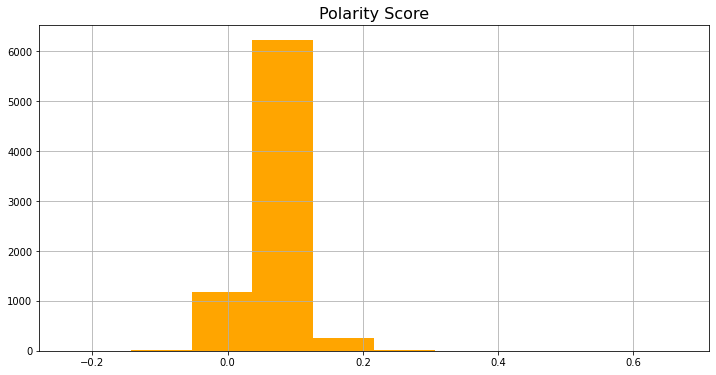

In [61]:
plt.figure(figsize=(12,6))
headlines_df['Polarity'].hist(color='orange')
plt.title("Polarity Score",fontsize=16)

Text(0.5, 1.0, 'Polarity Score')

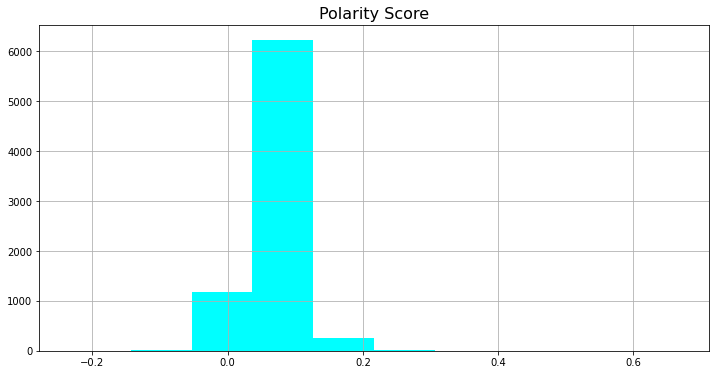

In [62]:
plt.figure(figsize=(12,6))
headlines_df['Polarity'].hist(color='cyan')
plt.title("Polarity Score",fontsize=16)

In [63]:
#Importing Sentimental Analysis:
sia=SentimentIntensityAnalyzer()

In [64]:
headlines_df["Compound"]=[sia.polarity_scores(v)['compound'] for v in headlines_df['News']]

In [65]:
headlines_df["Negative"]=[sia.polarity_scores(v)['neg'] for v in headlines_df['News']]

In [66]:
headlines_df["Neutral"]=[sia.polarity_scores(v)['neu'] for v in headlines_df['News']]

In [67]:
headlines_df["Positive"]=[sia.polarity_scores(v)['pos'] for v in headlines_df['News']]

In [68]:
headlines_df.head()

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.298684,0.180702,-0.9839,0.141,0.792,0.068
1,2001-01-03,Powerless north India gropes in the dark Think...,0.392857,0.089286,-0.8910,0.154,0.739,0.107
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.478086,0.089802,0.9178,0.102,0.784,0.114
3,2001-01-05,Light combat craft takes India into club class...,0.470967,0.260138,0.9753,0.127,0.690,0.183
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481,-0.8625,0.227,0.653,0.119


In [69]:
headlines_df.shape

(7717, 8)

##### *  Numerical/Historical Dataset Pre-Processing 

In [70]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,26720.980469,26447.060547,26711.150391,26595.449219,8000.0,26595.449219
1,2017-01-03,26724.400391,26488.369141,26616.919922,26643.240234,9800.0,26643.240234
2,2017-01-04,26723.369141,26606.060547,26677.220703,26633.130859,8100.0,26633.130859
3,2017-01-05,26917.210938,26738.419922,26738.419922,26878.240234,9800.0,26878.240234
4,2017-01-06,27009.609375,26733.330078,26929.689453,26759.230469,7800.0,26759.230469


In [71]:
stock=stock[['Date','High','Low','Open','Close','Volume']]

In [72]:
len(stock)

1404

In [73]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1404 non-null   datetime64[ns]
 1   High    1404 non-null   float64       
 2   Low     1404 non-null   float64       
 3   Open    1404 non-null   float64       
 4   Close   1404 non-null   float64       
 5   Volume  1404 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 65.9 KB


In [74]:
stock.isnull().sum()

Date      0
High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

In [75]:
stock.dropna(inplace=True)

In [76]:
len(stock)

1404

In [77]:
stock.describe()

,High,Low,Open,Close,Volume
count,1404.000000,1404.000000,1404.000000,1404.000000,1.404000e+03
mean,41688.036202,41188.743618,41484.070994,41439.208493,2.408795e+05
std,9795.672006,9682.879065,9748.060190,9750.112996,1.988804e+06
min,26720.980469,25638.900391,26499.810547,25981.240234,0.000000e+00
25%,34308.290039,33873.305664,34067.646484,34078.882812,9.200000e+03
50%,38399.253906,37921.195312,38213.445312,38142.244141,1.335000e+04
75%,50615.218750,49813.190430,50257.055664,50313.658203,1.920000e+04
max,62245.429688,61624.648438,62156.480469,61765.589844,3.181510e+07


##### Data Visualization

Text(0.5, 1.0, 'Closing Price')

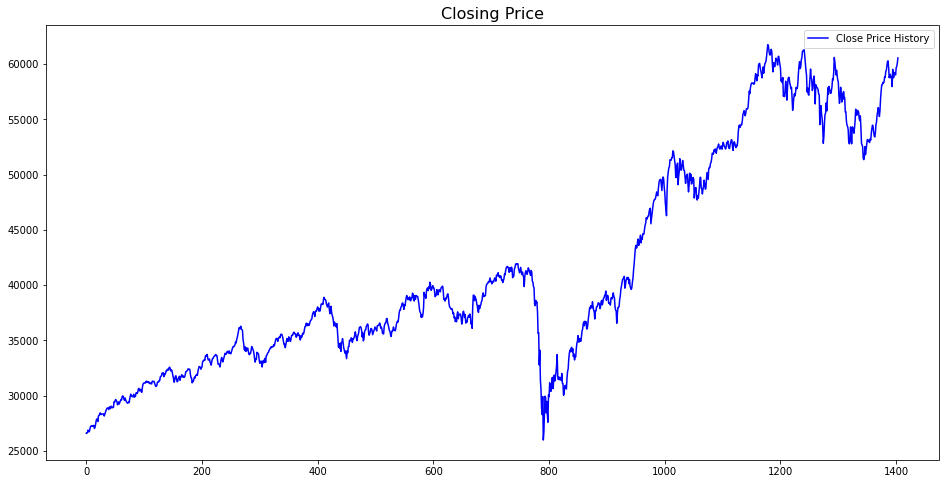

In [78]:
#Closing Price Graph

plt.figure(figsize=(16,8))

plt.plot(stock['Close'],label="Close Price History",color='blue')
plt.legend()
plt.title("Closing Price",fontsize=16)

##### Plotting Moving Average.

Moving Average: In finance, a moving average (MA) is a stock indicator commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data by creating a constantly updated average price.

Moving averages are calculated to identify the trend direction of a stock or to determine its support and resistance levels. It is a trend-following or lagging, indicator because it is based on past prices.

The longer the period for the moving average, the greater the lag. A 200-day moving average will have a much greater degree of lag than a 20-day MA because it contains prices for the past 200 days. 

* Why rolling mean is used?

They are typically utilized to smooth out data series. The ultimate purpose of rolling averages is to identify long—term trends. They are calculated by averaging a group of observations of a variable of interest over a specific period of time. Such averaged number becomes representative of that period in a trend line.

* What is Rolling Standard Deviation?

The moving standard deviation is a measure of market volatility. It makes no predictions of market direction, but it may serve as a confirming indicator. You specify the number of periods to use, and the study computes the standard deviation of prices from the moving average of the prices.

Text(0.5, 1.0, 'Moving Average')

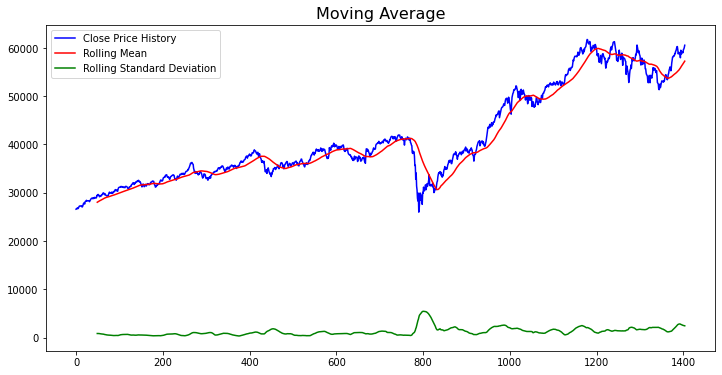

In [79]:
#Plotting the Moving Average.

close=stock['Close']

MA=close.rolling(window=50).mean()
std=close.rolling(window=50).std()

plt.figure(figsize=(12,6))
plt.plot(stock['Close'],label='Close Price History',color='blue')

plt.plot(MA,label='Rolling Mean',color='red')
plt.plot(std,label='Rolling Standard Deviation',color='green')

plt.legend()

plt.title("Moving Average",fontsize=16)



A return is the change in price of an asset, investment, or project over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

Text(0.5, 1.0, 'Return')

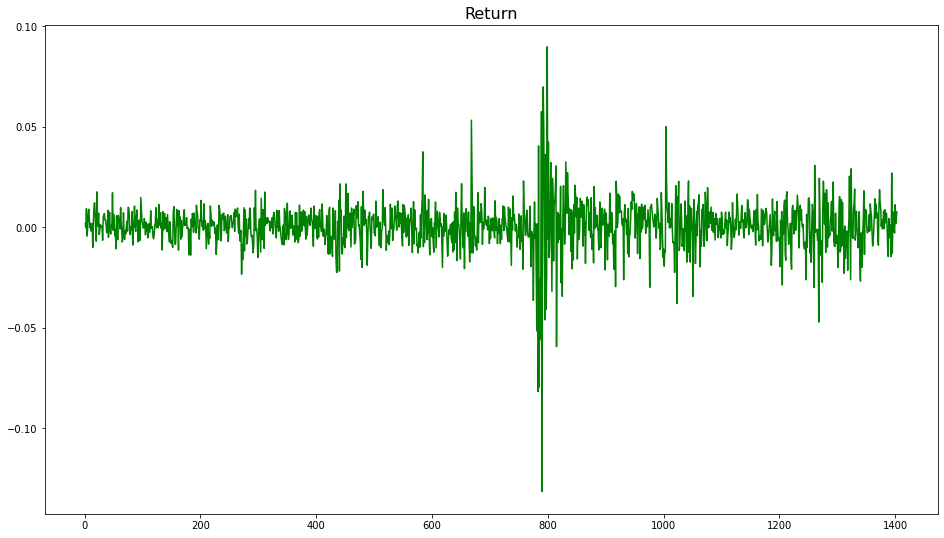

In [80]:
#Plotting the Returns



returns=close/close.shift(1)-1

plt.figure(figsize=(16,9))
plt.plot(returns,label='Return',color='green')
plt.title('Return',fontsize=16)


#Dickey Fuller Test:


When we make a model for forecasting purposes in time series analysis, we require a stationary time series for better prediction. So the first step to work on modeling is to make a time series stationary. Testing for stationarity is a frequently used activity in autoregressive modeling. We can perform various tests like the KPSS, Phillips–Perron, and Augmented Dickey-Fuller. 


ADF (Augmented Dickey-Fuller) test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses. As a result, we will have a p-value from which we will need to make inferences about the time series, whether it is stationary or not.



A simple AR model can be represented as:


where

yt is variable of interest at the time t
ρ is a coefficient that defines the unit root
ut  is noise or can be considered as an error term.
If ρ = 1, the unit root is present in a time series, and the time series is non-stationary.

If a regression model can be represented as 


Where 

Δ is a difference operator.
ẟ = ρ-1
So here, if ρ = 1, which means we will get the differencing as the error term and if the coefficient has some values smaller than one or bigger than one, we will see the changes according to the past observation.



Implementation of ADF Test
To perform the ADF test in any time series package, statsmodel provides the implementation function adfuller().

Function adfuller() provides the following information.

p-value
Value of the test statistic
Number of lags for testing consideration
The critical values




* What is Stationary and Non stationary time series?

A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. Stationarity, then, is the status of a stationary time series. Conversely, nonstationarity is the status of a time series whose statistical properties are changing through time.

In [81]:
#Stationary Test:

#defining the function

def test_stationary(timeseries):
    rolmean=timeseries.rolling(20).mean()
    rolstd=timeseries.rolling(20).std()
    
    #Plotting the Rolling Statistics.
    
    
    plt.figure(figsize=(16,9))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label="Rolling Mean")
    plt.plot(rolstd,color='green',label="Rolling Standard Deviation")
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation',fontsize=16)
    plt.show(block=False)
    
    
    print("Result of Dickey Fuller Test")
    result=adfuller(timeseries, autolag='AIC')
    labels=['ADF Test Statistics','p-value','Number of Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+ str(value))
   
    
    
    if result[1] <= 0.05:
        print("Strong Evidence against the null hypothesis(H0),Reject the Null Hypothesis. Data is Stationary.")
    else:
        print("Weak Evidence againt null hypothesis,time series is non-stationary.")

In [82]:
#Splitting the data:

train,test=stock[:1123], stock[1123:len(stock)]

In [83]:
train.shape

(1123, 6)

In [84]:
test.shape

(281, 6)

In [85]:
train.head()

,Date,High,Low,Open,Close,Volume
0,2017-01-02,26720.980469,26447.060547,26711.150391,26595.449219,8000.0
1,2017-01-03,26724.400391,26488.369141,26616.919922,26643.240234,9800.0
2,2017-01-04,26723.369141,26606.060547,26677.220703,26633.130859,8100.0
3,2017-01-05,26917.210938,26738.419922,26738.419922,26878.240234,9800.0
4,2017-01-06,27009.609375,26733.330078,26929.689453,26759.230469,7800.0


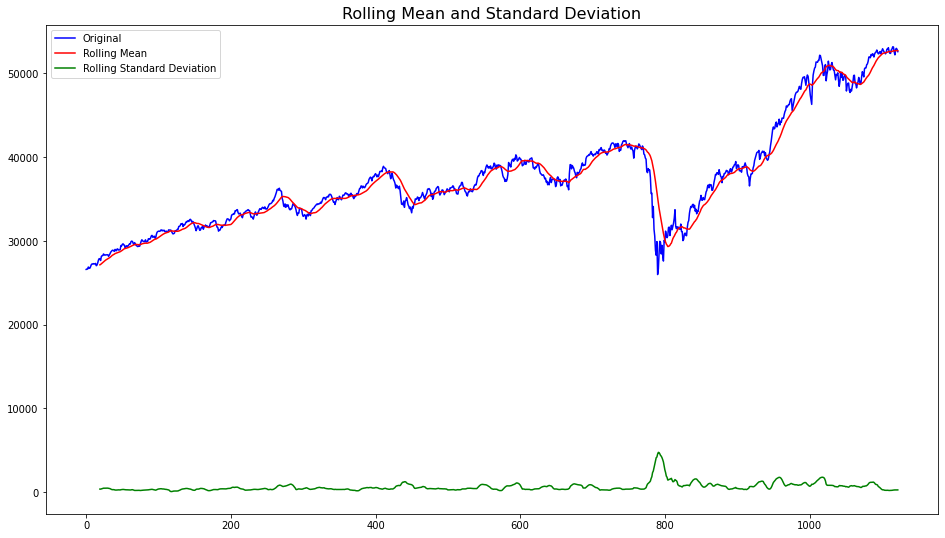

Result of Dickey Fuller Test
ADF Test Statistics : -0.7166228154134394
p-value : 0.842396743122845
Number of Lags Used : 12
Number of Observations Used : 1110
Weak Evidence againt null hypothesis,time series is non-stationary.


In [86]:
#Applying the stationary test on train close data.

test_stationary(train['Close']) 

In [87]:
np.log(train['Close']).head()    #Log value of closed price ...

0    10.188495
1    10.190291
2    10.189911
3    10.199072
4    10.194635
Name: Close, dtype: float64

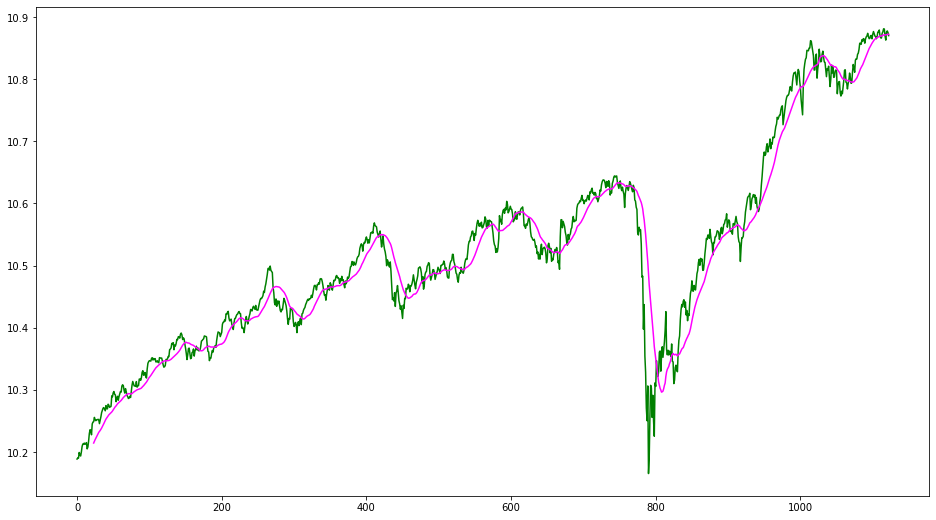

In [88]:
train_log=np.log(train['Close'])
test_log=np.log(test['Close'])


mav=train_log.rolling(24).mean()
plt.figure(figsize=(16,9))

plt.plot(train_log,color='green')
plt.plot(mav,color='magenta')

In [89]:
train_log.dropna(inplace=True)
test_log.dropna(inplace=True)

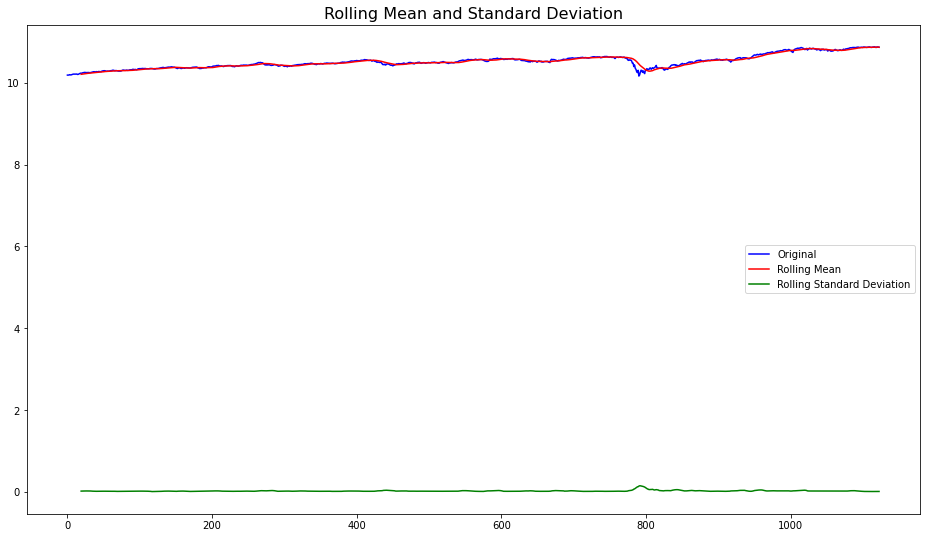

Result of Dickey Fuller Test
ADF Test Statistics : -1.1925202035989546
p-value : 0.6768050264891117
Number of Lags Used : 11
Number of Observations Used : 1111
Weak Evidence againt null hypothesis,time series is non-stationary.


In [90]:
test_stationary(train_log)

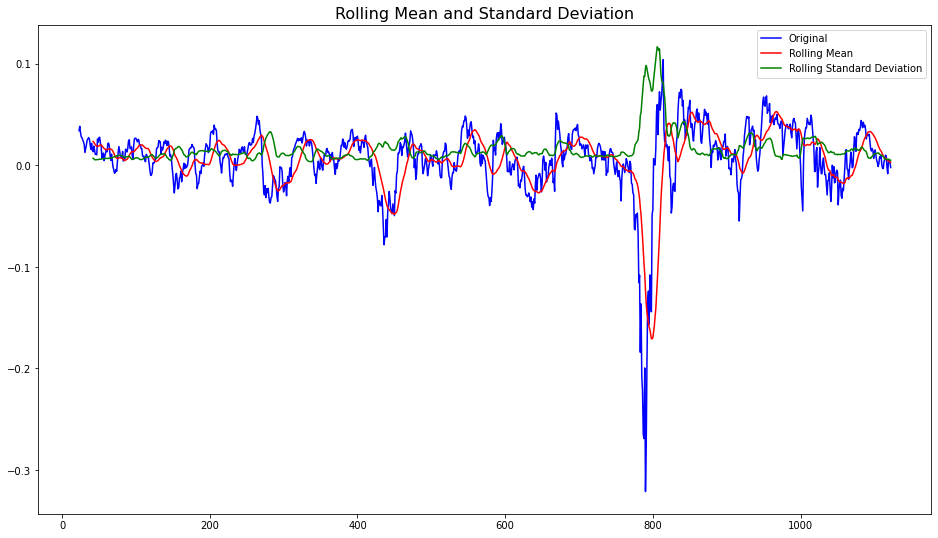

Result of Dickey Fuller Test
ADF Test Statistics : -6.622990021883484
p-value : 5.97205845071333e-09
Number of Lags Used : 12
Number of Observations Used : 1087
Strong Evidence against the null hypothesis(H0),Reject the Null Hypothesis. Data is Stationary.


In [91]:
train_log_diff=train_log-mav

train_log_diff.dropna(inplace=True)
test_stationary(train_log_diff)

##### Training the Model 

In [92]:
#Using the auto ARIMA to make predictions using log data.
#FIRST WE NEED TO INSTALL pmdarima in comand prompt using the code pip install pmdarima

In [93]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [94]:
from pmdarima import auto_arima

In [95]:
model=auto_arima(train_log,trace=True,error_action='ignore',suppress_warnings=True)

model.fit(train_log)

predictions=model.predict(n_periods= len(test))
predictions=pd.DataFrame(predictions, index=test_log.index, columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6725.011, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6727.560, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6730.254, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6729.995, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6726.711, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6729.002, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6728.655, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6727.371, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-6729.019, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.290 seconds


Text(0, 0.5, 'ACTUAL STOCK PRICE')

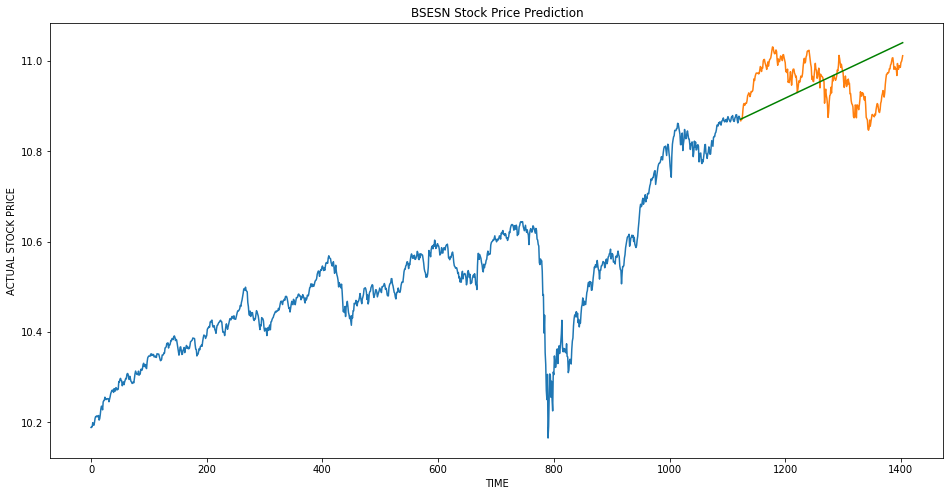

In [96]:
plt.figure(figsize=(16,8))
plt.plot(train_log,label='Train')
plt.plot(test_log,label="Test")
plt.plot(predictions,color='green' ,label="Prediction")

plt.title("BSESN Stock Price Prediction")
plt.xlabel("TIME")
plt.ylabel("ACTUAL STOCK PRICE")

In [97]:
#Green line depicts the prediction.

In [98]:
#Root mean squared error.

rmse=np.sqrt(mean_squared_error(test_log,predictions))
print("The Root mean squared error is :",rmse)

The Root mean squared error is : 0.0733594396516538


In [99]:
news.sample(100)

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
7238,2020-12-08,All highway projects to be ready by June next ...,0.378391,0.040516,-0.9999,0.152,0.758,0.090
4183,2012-07-28,Authority gives relief to co operative housing...,0.386936,0.071852,-0.9999,0.157,0.750,0.093
2930,2009-02-21,Soul Curry Any good news Mind Set Go by your...,0.432266,0.070945,-0.9995,0.146,0.741,0.113
4284,2012-11-06,Who stalked Karan Singh Grover Tia is a very t...,0.372585,0.054513,-1.0000,0.188,0.723,0.089
3616,2011-01-08,Make a New Year financial plan Do you wait for...,0.441909,0.094818,-0.9999,0.187,0.701,0.112
...,...,...,...,...,...,...,...,...
3050,2009-06-21,Texting ruins kids academics The evolutionary...,0.398709,0.075925,-0.9998,0.172,0.715,0.113
790,2003-04-14,Karisma Brings back the zing in her life Ra...,0.399543,0.095196,-0.9987,0.165,0.729,0.106
2508,2007-12-27,It ll be a babe rush Catwalk to new year That ...,0.431774,0.052008,-0.9992,0.164,0.740,0.097
1032,2003-12-12,COUNTERVIEWBRTypical American double standard ...,0.420917,0.109888,-0.9977,0.143,0.763,0.094


#### Step 4: Merge the Numerical and Textual Data

In [100]:
df_merge=pd.merge(headlines_df,stock,how='inner',on='Date')
df_merge

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
0,2017-01-02,Destress plan for the first Monday of 2017 Pun...,0.383537,0.048300,-0.9999,0.170,0.719,0.111,26720.980469,26447.060547,26711.150391,26595.449219,8000.0
1,2017-01-03,State opposition dismisses Samajwadi Party feu...,0.407776,0.039766,-0.9999,0.155,0.739,0.106,26724.400391,26488.369141,26616.919922,26643.240234,9800.0
2,2017-01-04,Rudra Soni ready to go bald for TV not Bollyw...,0.357630,0.072457,-1.0000,0.168,0.742,0.090,26723.369141,26606.060547,26677.220703,26633.130859,8100.0
3,2017-01-05,Decoding Buddhist prayer flags 3 Punjabi films...,0.378495,0.076935,-0.9999,0.158,0.734,0.108,26917.210938,26738.419922,26738.419922,26878.240234,9800.0
4,2017-01-06,Will stay bachelor to serve Akhilesh says thr...,0.393591,0.060879,-0.9999,0.156,0.740,0.104,27009.609375,26733.330078,26929.689453,26759.230469,7800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,2022-03-25,Speeding up shortcuts and tackling unruly cus...,0.368342,-0.006025,-1.0000,0.183,0.742,0.075,57845.371094,57100.238281,57801.718750,57362.199219,6900.0
1288,2022-03-28,As fashion becomes democratic demand for styl...,0.372774,0.060228,-0.9999,0.161,0.740,0.100,57638.339844,56825.089844,57472.718750,57593.488281,6300.0
1289,2022-03-29,Bobby Deol Like my dad I hope to be working ...,0.399341,0.091038,-0.9999,0.161,0.755,0.084,58001.531250,57639.351562,57814.761719,57943.648438,12100.0
1290,2022-03-30,I will not give in to trends Dossmode The tim...,0.335133,0.037703,-0.9999,0.159,0.767,0.074,58727.781250,58176.000000,58362.851562,58683.988281,6300.0


#### Step 5: Creating a Dataset for Model Training

In [101]:
final=df_merge[['Close','Subjectivity','Polarity','Compound','Negative','Neutral','Positive']]
final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,26595.449219,0.383537,0.048300,-0.9999,0.170,0.719,0.111
1,26643.240234,0.407776,0.039766,-0.9999,0.155,0.739,0.106
2,26633.130859,0.357630,0.072457,-1.0000,0.168,0.742,0.090
3,26878.240234,0.378495,0.076935,-0.9999,0.158,0.734,0.108
4,26759.230469,0.393591,0.060879,-0.9999,0.156,0.740,0.104
...,...,...,...,...,...,...,...
1287,57362.199219,0.368342,-0.006025,-1.0000,0.183,0.742,0.075
1288,57593.488281,0.372774,0.060228,-0.9999,0.161,0.740,0.100
1289,57943.648438,0.399341,0.091038,-0.9999,0.161,0.755,0.084
1290,58683.988281,0.335133,0.037703,-0.9999,0.159,0.767,0.074


#### Step 6:Normalize Data

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [103]:
df=pd.DataFrame(scaler.fit_transform(final))
df.columns=final.columns
df.index=final.index

In [104]:
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.017164,0.493808,0.447466,0.00005,0.643411,0.12500,0.686747
1,0.018500,0.669637,0.379328,0.00005,0.527132,0.25000,0.626506
2,0.018217,0.305881,0.640336,0.00000,0.627907,0.26875,0.433735
3,0.025067,0.457231,0.676091,0.00005,0.550388,0.21875,0.650602
4,0.021741,0.566736,0.547902,0.00005,0.534884,0.25625,0.602410


In [105]:
X=df.drop('Close',axis=1)   #Features
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.493808,0.447466,0.00005,0.643411,0.12500,0.686747
1,0.669637,0.379328,0.00005,0.527132,0.25000,0.626506
2,0.305881,0.640336,0.00000,0.627907,0.26875,0.433735
3,0.457231,0.676091,0.00005,0.550388,0.21875,0.650602
4,0.566736,0.547902,0.00005,0.534884,0.25625,0.602410
...,...,...,...,...,...,...
1287,0.383585,0.013734,0.00000,0.744186,0.26875,0.253012
1288,0.415735,0.542699,0.00005,0.573643,0.25625,0.554217
1289,0.608448,0.788692,0.00005,0.573643,0.35000,0.361446
1290,0.142690,0.362859,0.00005,0.558140,0.42500,0.240964


In [106]:
y=df['Close']              #Target
y

0       0.017164
1       0.018500
2       0.018217
3       0.025067
4       0.021741
          ...   
1287    0.876946
1288    0.883410
1289    0.893195
1290    0.913884
1291    0.910657
Name: Close, Length: 1292, dtype: float64

#### Step 7: Splitting the Data

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Step 8: Deploying Different Models

* Applying Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))


Mean Squared Error :  0.05698889638413952


* Applying Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.096559982599174


* Applying AdaBoost Regressor

In [110]:
from sklearn.ensemble import AdaBoostRegressor

adb=AdaBoostRegressor()
adb.fit(X_train,y_train)

y_pred=adb.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.057923902728628296


* Applying LGBM Regressor

In [111]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [112]:
import lightgbm

gbm=lightgbm.LGBMRegressor()

gbm.fit(X_train,y_train)


y_pred=gbm.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.06384946650767759


* Applying XGBoost Regressor

In [113]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [114]:
import xgboost as xgb

xgb=xgb.XGBRegressor()
xgb.fit(X_train,y_train)

y_pred=xgb.predict(X_test)
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))

Mean Squared Error :  0.0680421510332517


#### CONCLUSION :

                                             MEAN_SQUARED_ERROR

* RANDOM FOREST REGRESSOR MODEL  : 0.05698889638413952
    
* DECISION TREE REGRESSOR MODEL  : 
    
* ADABOOST REGRESSOR  MODEL      : 0.05787635010741542
    
* LGBM MODEL                     : 0.06384946650767759

* XGBOOST MODEL                  : 0.0680421510332517


##### THE BEST PERFORMING MODEL IS RANDOM FOREST REGRESSOR.

 ------------------------------------------------------------------------------THANK YOU -----------------------------------------------------------------------------------------------